# Experimento 10: _grid search_ e validação com KNN usando FS20

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [3]:
def col_in_fs20(string:str) -> bool:
    for feature in FS20:
        if feature in string:
            return True
    return False

chb_df = pd.read_csv('./chb.csv')

# Atributos FS20
FS20 = ['medianAD-D3', 'medianAD-D4', 'medianAD-D5', 'medianAD-A5',
        'energy-D3', 'energy-D4', 'energy-D5', 'energy-A5',
        'meanAD-D3', 'meanAD-D4', 'meanAD-A5',
        'kurt-D5', 'kurt-A5', 'skew-D4']
fs20_columns = np.array([col for col in chb_df.columns if col_in_fs20(col)])

MELHORES_6_CANAIS = ['2', '3', '6', '7', '10', '14']
melhores_colunas = [col for col in chb_df.columns if col.split('-')[-1] in MELHORES_6_CANAIS]

groups = chb_df.pop('chb')
y = chb_df.pop('target').values
X_fs20 = chb_df[fs20_columns].values
X_6_ch = chb_df[melhores_colunas].values

In [3]:
results = GridSearchCV(
    estimator=make_pipeline(StandardScaler(), SVC()),
    param_grid={'svc__C':[0.1, 1, 10, 100, 1000, 10_000],
                'svc__gamma':np.arange(0.5, 1.5, 0.1)},
    cv=GroupKFold(n_splits=24),
    n_jobs=-1
    ).fit(
        X=X,
        y=y,
        groups=groups
        ).cv_results_

results_df = pd.DataFrame(results)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,mean_test_score,std_test_score,rank_test_score
0,90.704469,5.711939,3.754743,2.102194,0.1,0.5,"{'svc__C': 0.1, 'svc__gamma': 0.5}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
1,90.100316,5.503972,3.861664,2.139092,0.1,0.6,"{'svc__C': 0.1, 'svc__gamma': 0.6}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
2,90.410437,5.504580,3.856492,2.382266,0.1,0.7,"{'svc__C': 0.1, 'svc__gamma': 0.7}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
3,90.294697,4.971049,3.798823,2.147354,0.1,0.8,"{'svc__C': 0.1, 'svc__gamma': 0.7999999999999999}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
4,91.252662,5.118694,3.506551,1.956492,0.1,0.9,"{'svc__C': 0.1, 'svc__gamma': 0.8999999999999999}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
5,90.501028,4.843453,3.822255,2.199348,0.1,1,"{'svc__C': 0.1, 'svc__gamma': 0.9999999999999999}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
6,90.682570,4.659263,3.768319,2.281991,0.1,1.1,"{'svc__C': 0.1, 'svc__gamma': 1.0999999999999999}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
7,90.551838,5.197785,3.829968,2.195589,0.1,1.2,"{'svc__C': 0.1, 'svc__gamma': 1.1999999999999997}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
8,90.613425,5.682993,3.737937,2.246590,0.1,1.3,"{'svc__C': 0.1, 'svc__gamma': 1.2999999999999998}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47
9,90.597768,5.142667,3.812657,2.101385,0.1,1.4,"{'svc__C': 0.1, 'svc__gamma': 1.4}",0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,47


param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
0.100000,0.500000,0.500000,0.000000,47
0.100000,0.600000,0.500000,0.000000,47
0.100000,0.700000,0.500000,0.000000,47
0.100000,0.800000,0.500000,0.000000,47
0.100000,0.900000,0.500000,0.000000,47
0.100000,1.000000,0.500000,0.000000,47
0.100000,1.100000,0.500000,0.000000,47
0.100000,1.200000,0.500000,0.000000,47
0.100000,1.300000,0.500000,0.000000,47
0.100000,1.400000,0.500000,0.000000,47


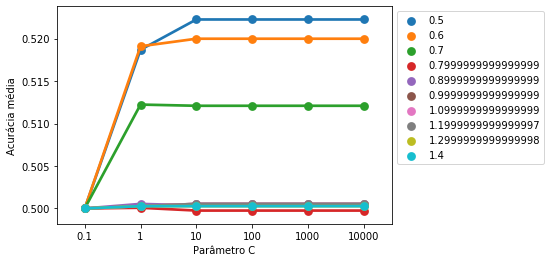

In [6]:
sns.pointplot(
    data=results_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

            fs20       6_ch
count  24.000000  24.000000
mean    0.522252   0.789761
std     0.044117   0.180005
min     0.447674   0.404412
25%     0.497768   0.789683
50%     0.517276   0.852780
75%     0.545861   0.898153
max     0.622449   0.979798


fs20,6_ch
0.481092,0.578782
0.604396,0.800000
0.567500,0.823750
0.523636,0.936364
0.447674,0.536822
0.477459,0.864754
0.518349,0.970183
0.516204,0.861111
0.538647,0.963768
0.622449,0.951531


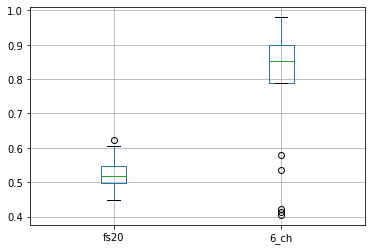

In [4]:
acc_list = []

pipe_fs20 = make_pipeline(StandardScaler(), SVC(C=10, gamma=0.5, cache_size=500))

pipe_6_ch = make_pipeline(StandardScaler(), SVC(C=0.05, gamma=0.0045, cache_size=500))

for train_index, test_index in GroupKFold(n_splits=24).split(X_fs20, y, groups):
    # Separando dados
    y_train, y_test = y[train_index], y[test_index]
    X_fs20_train, X_fs20_test = X_fs20[train_index], X_fs20[test_index]
    X_6_ch_train, X_6_ch_test = X_6_canais[train_index], X_6_canais[test_index]

    acc_list.append([
        pipe_fs20.fit(X_fs20_train, y_train).score(X_fs20_test, y_test),
        pipe_6_ch.fit(X_6_ch_train, y_train).score(X_6_ch_test, y_test)
    ])


svm_df = pd.DataFrame(data=acc_list, columns=['fs20', '6_ch'])
svm_df.to_csv('./04-fs20-svm.csv')

svm_df.boxplot()

print(svm_df.describe())

svm_df.style.hide_index().background_gradient(cmap='Blues')